In [7]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv("/content/dataset.csv")


In [9]:
#print first few rows of dataframe
df.head()



,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [10]:
df.shape

(112634, 17)

In [11]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [13]:

df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112348.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.805604,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.700545,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [14]:
#Data cleaning
df.isna().sum()


,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,20
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [15]:

# Convert 'Postal Code' and '2020 Census Tract' to object (string) type
df['Postal Code'] = df['Postal Code'].astype(str)
df['2020 Census Tract'] = df['2020 Census Tract'].astype(str)


df['Legislative District'] = df['Legislative District'].fillna(0).astype(int)


In [16]:
#Impute missing values in 'Model' with the most frequent value (mode)
most_frequent_model = df['Model'].mode()[0]
df['Model'].fillna(most_frequent_model, inplace=True)


In [17]:
df.dropna(subset=['Vehicle Location'], inplace=True)

df['Electric Utility'].fillna('Unknown', inplace=True)


In [18]:
missing_values_after = df.isna().sum()

missing_values_after

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [19]:
# Remove outliers based on the conditions provided

df_filtered = df[df['Model Year'] >= 2010]

df_filtered = df_filtered[(df_filtered['Base MSRP'] > 0) & (df_filtered['Base MSRP'] <= 175000)]

df_filtered = df_filtered[~((df_filtered['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)') & (df_filtered['Electric Range'] > 50))]


In [20]:
df_filtered.describe()


,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
count,3475.000000,3475.000000,3475.000000,3475.000000,3.475000e+03
mean,2015.529496,125.497842,56586.010072,30.640863,2.054108e+08
std,2.396128,89.067450,16839.576804,14.597555,1.004608e+08
min,2010.000000,12.000000,31950.000000,0.000000,9.658900e+04
25%,2013.000000,17.000000,39995.000000,21.000000,1.424952e+08
50%,2016.000000,111.000000,59900.000000,35.000000,1.898982e+08
75%,2018.000000,208.000000,69900.000000,43.000000,2.429121e+08
max,2020.000000,265.000000,110950.000000,49.000000,4.788591e+08


In [21]:
df_filtered.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
9,KNDJP3AE2G,Skagit,Anacortes,WA,98221,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,40,100489049,POINT (-122.61214 48.51748),PUGET SOUND ENERGY INC,53057940301
24,WBAJB1C51K,Snohomish,Lynnwood,WA,98087,2019,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15,55700,21,180189544,POINT (-122.27981 47.85727),PUGET SOUND ENERGY INC,53061042004
33,KNDJX3AE6J,Thurston,Lacey,WA,98503,2018,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,111,33950,22,333554245,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,53067011200
190,5YJSA1H16E,King,Renton,WA,98056,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,41,221096403,POINT (-122.18463 47.49929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033024704
191,5YJSA1H12E,King,Sammamish,WA,98075,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,41,336807320,POINT (-122.03539 47.61344),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032215


In [22]:
df.duplicated().sum()


0

**Univariate Analysis**

In [23]:
#NON-Visualization
def num_uni_anl(d):
  for column in d:
    print("*"*5,column,"*"*5)
    print("min :",df[column].min())
    print("max :",df[column].max())
    print("mean:",df[column].mean())
    print("median:",df[column].median())
    print("mode:",df[column].mode())
    print("skew ness :",df[column].skew())
    print("kurtosis:",df[column].kurt())
    print("-------------------------------------------------------------")
num_uni_anl(df[["Electric Range","Base MSRP"]])



***** Electric Range *****
min : 0
max : 337
mean: 87.81613533433976
median: 32.0
mode: 0    0
Name: Electric Range, dtype: int64
skew ness : 0.8170030503861595
kurtosis: -0.8765515572682139
-------------------------------------------------------------
***** Base MSRP *****
min : 0
max : 845000
mean: 1793.535520824083
median: 0.0
mode: 0    0
Name: Base MSRP, dtype: int64
skew ness : 10.100353902858584
kurtosis: 371.6722204741136
-------------------------------------------------------------


In [24]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
def num_uni(numerical_data):
    for col_name in numerical_data:
        print("--"*20, col_name, "--"*20)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()
num_uni(numerical_df)


---------------------------------------- Model Year ----------------------------------------
min       1997.000000
max       2023.000000
mean      2019.004085
median    2020.000000
std          2.891807
Name: Model Year, dtype: float64

---------------------------------------- Electric Range ----------------------------------------
min         0.000000
max       337.000000
mean       87.816135
median     32.000000
std       102.338094
Name: Electric Range, dtype: float64

---------------------------------------- Base MSRP ----------------------------------------
min            0.000000
max       845000.000000
mean        1793.535521
median         0.000000
std        10784.490220
Name: Base MSRP, dtype: float64

---------------------------------------- Legislative District ----------------------------------------
min        0.000000
max       49.000000
mean      29.732466
median    34.000000
std       14.757719
Name: Legislative District, dtype: float64

-------------------------------

In [25]:

summary_stats = df.describe()
print(summary_stats)

          Model Year  Electric Range      Base MSRP  Legislative District  \
count  112610.000000   112610.000000  112610.000000         112610.000000   
mean     2019.004085       87.816135    1793.535521             29.732466   
std         2.891807      102.338094   10784.490220             14.757719   
min      1997.000000        0.000000       0.000000              0.000000   
25%      2017.000000        0.000000       0.000000             18.000000   
50%      2020.000000       32.000000       0.000000             34.000000   
75%      2022.000000      208.000000       0.000000             43.000000   
max      2023.000000      337.000000  845000.000000             49.000000   

       DOL Vehicle ID  
count    1.126100e+05  
mean     1.994609e+08  
std      9.398396e+07  
min      4.777000e+03  
25%      1.484148e+08  
50%      1.923910e+08  
75%      2.191905e+08  
max      4.792548e+08  


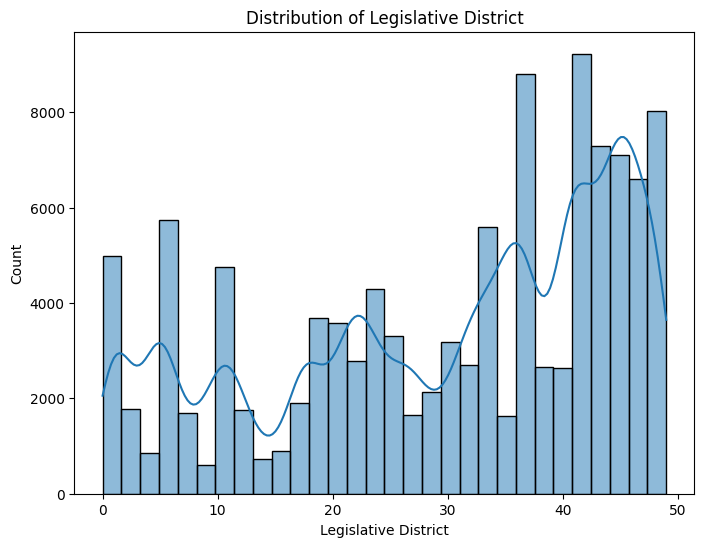

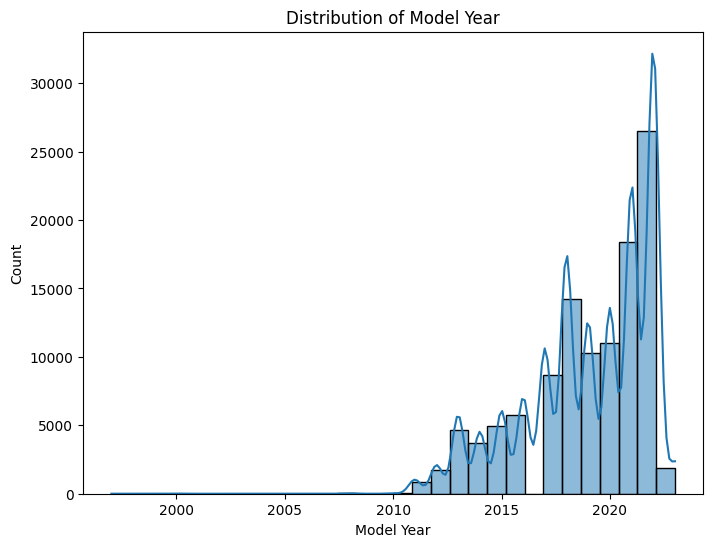

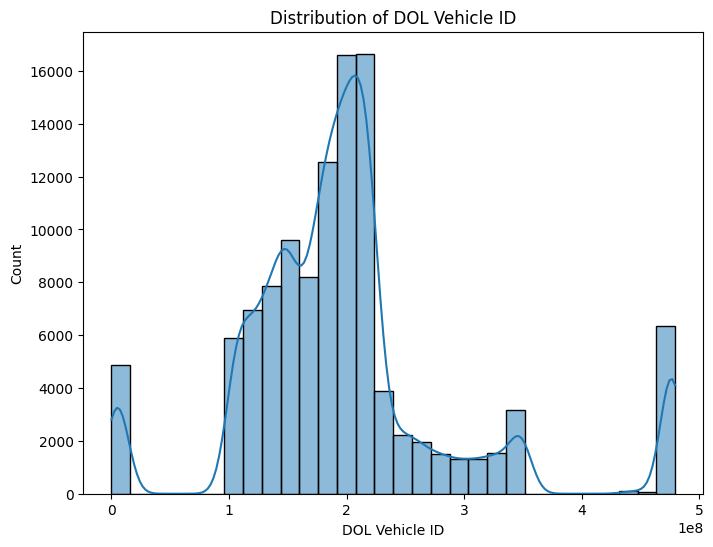

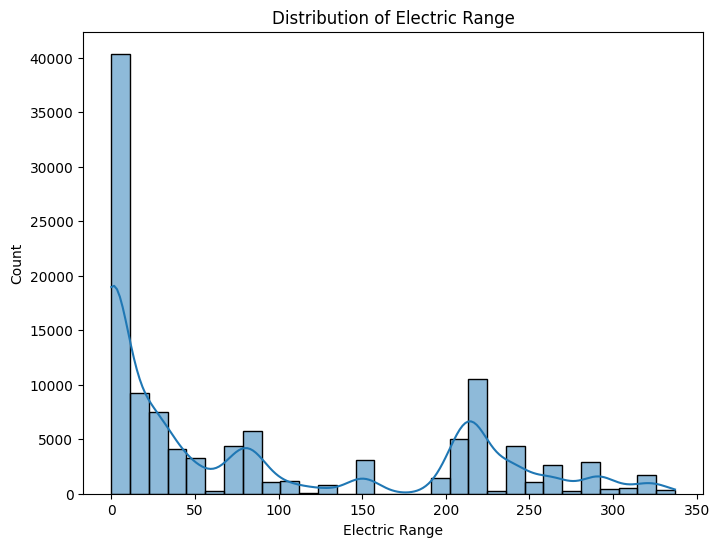

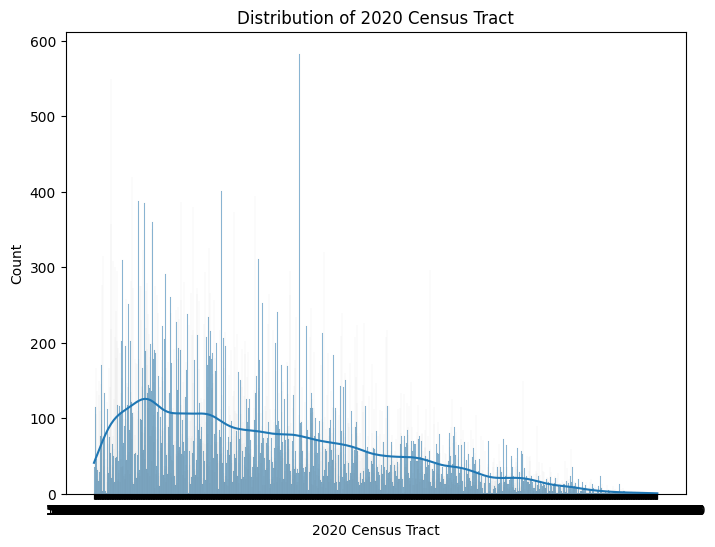

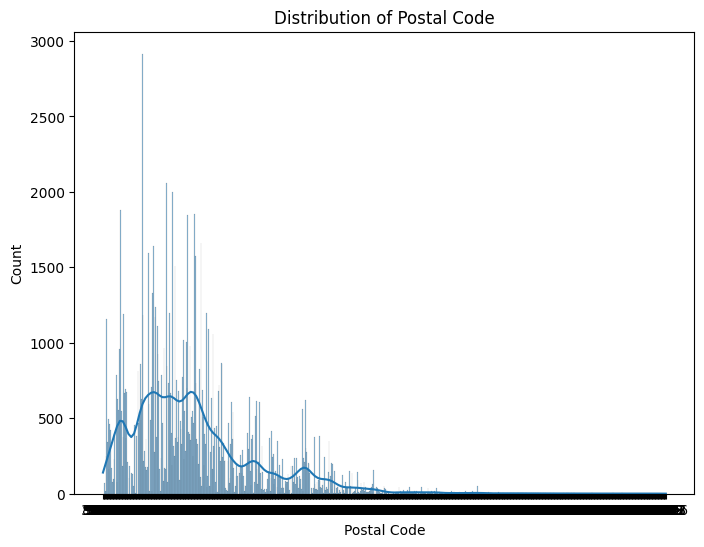

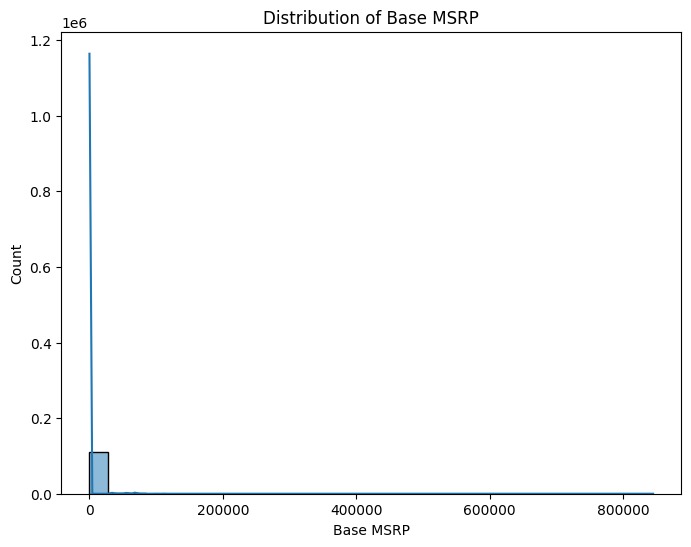

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ['Legislative District','Model Year','DOL Vehicle ID','Electric Range','2020 Census Tract','Postal Code','Base MSRP']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

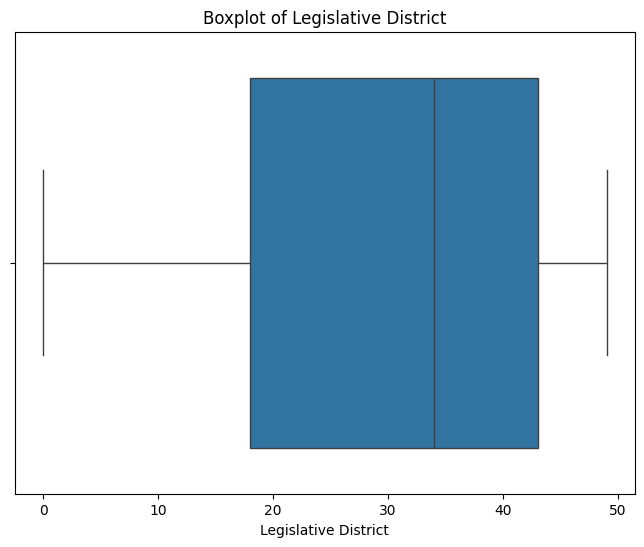

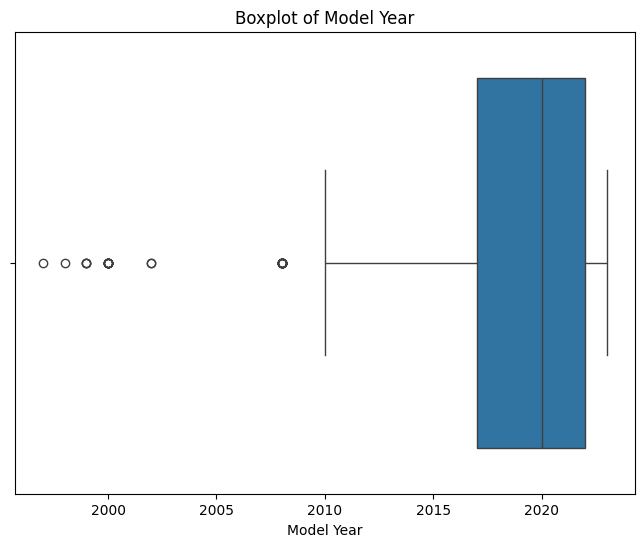

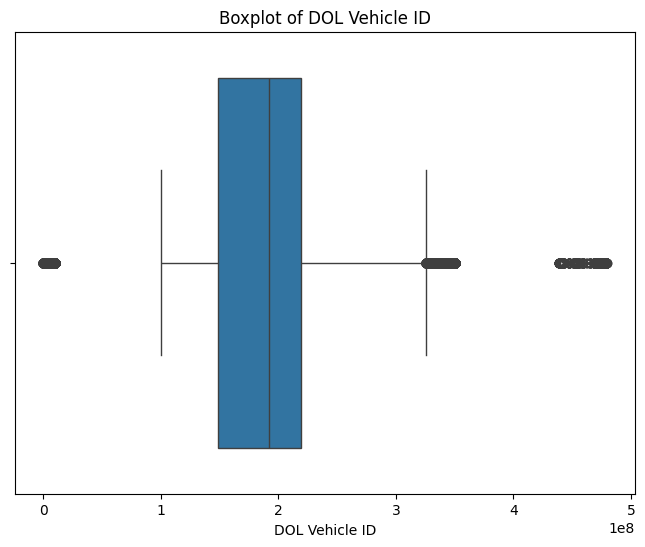

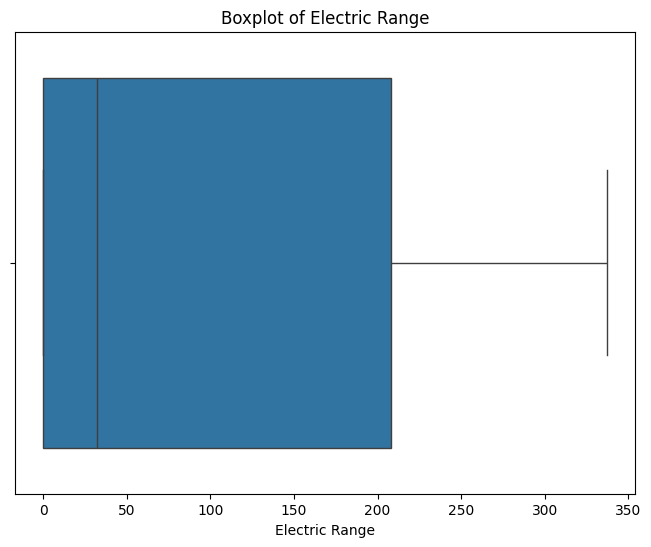

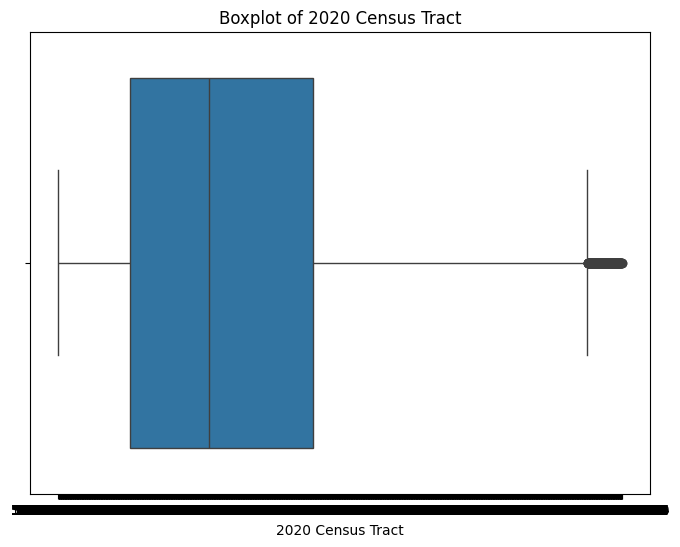

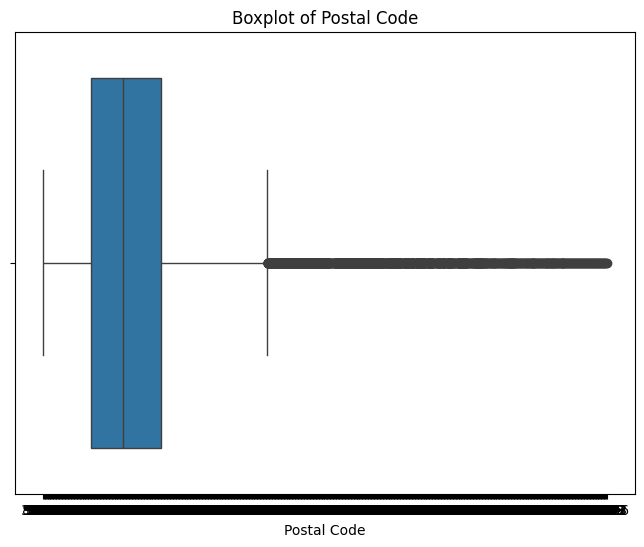

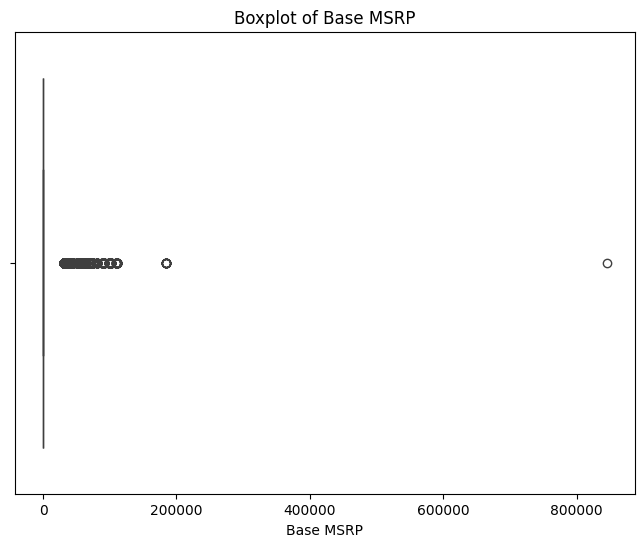

In [27]:

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


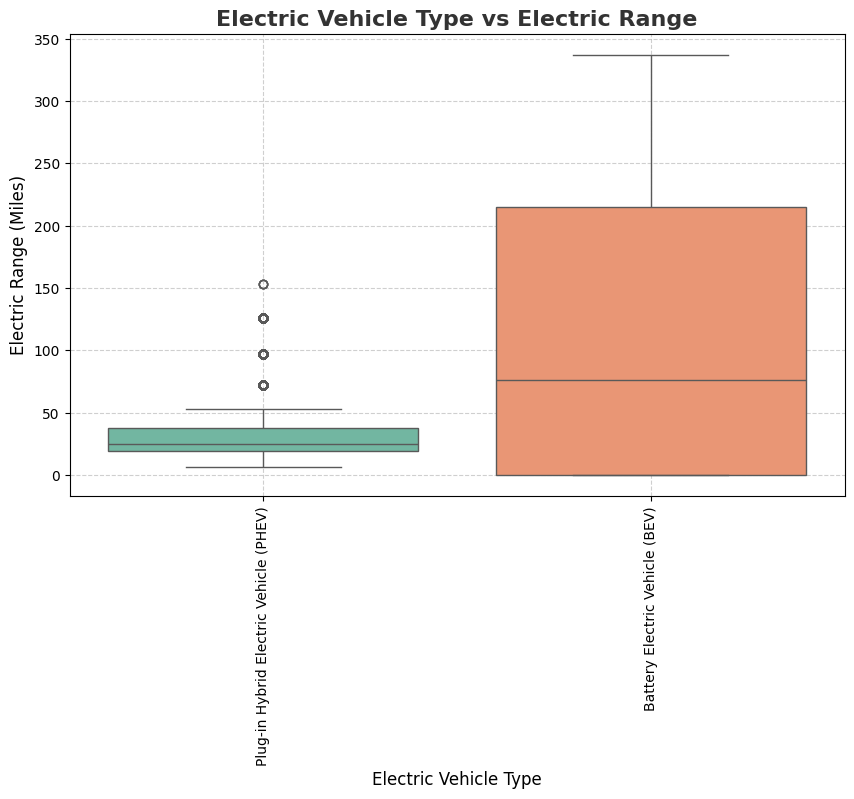

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df, palette='Set2')  # Using a visually appealing palette 'Set2'
plt.title('Electric Vehicle Type vs Electric Range', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Electric Vehicle Type', fontsize=12, fontweight='medium')
plt.ylabel('Electric Range (Miles)', fontsize=12, fontweight='medium')
plt.xticks(rotation=90, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

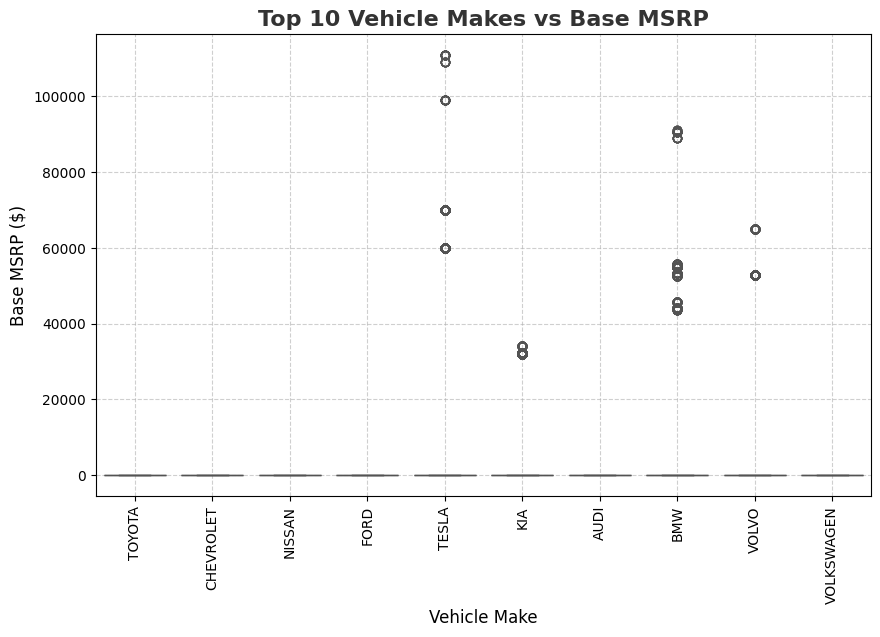

In [29]:
plt.figure(figsize=(10, 6))
top_makes = df['Make'].value_counts().nlargest(10).index
sns.boxplot(x='Make', y='Base MSRP', data=df[df['Make'].isin(top_makes)], palette='coolwarm')  # Using 'coolwarm' palette for contrast
plt.title('Top 10 Vehicle Makes vs Base MSRP', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Vehicle Make', fontsize=12, fontweight='medium')
plt.ylabel('Base MSRP ($)', fontsize=12, fontweight='medium')
plt.xticks(rotation=90, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Bivariate Analysis**

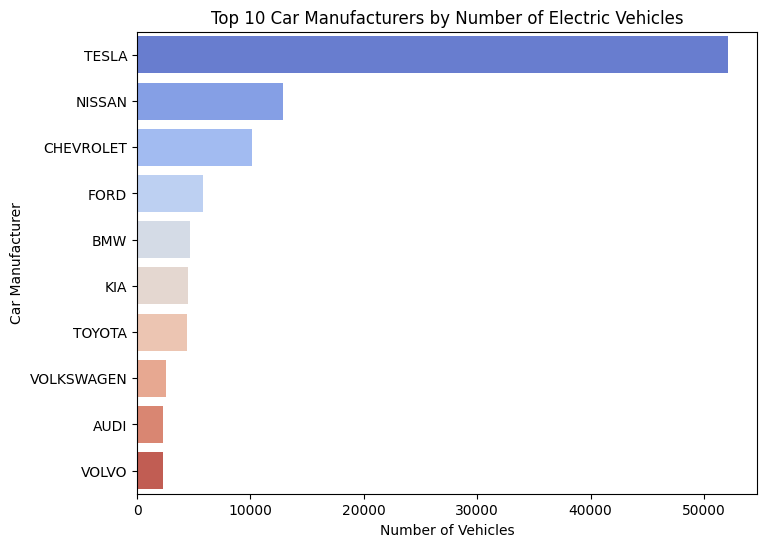

In [30]:
# Distribution of Car Manufacturers (Top 10)
plt.figure(figsize=(8,6))
sns.countplot(data=df, y='Make', order=df['Make'].value_counts().nlargest(10).index, palette='coolwarm')
plt.title('Top 10 Car Manufacturers by Number of Electric Vehicles')
plt.xlabel('Number of Vehicles')
plt.ylabel('Car Manufacturer')
plt.show()

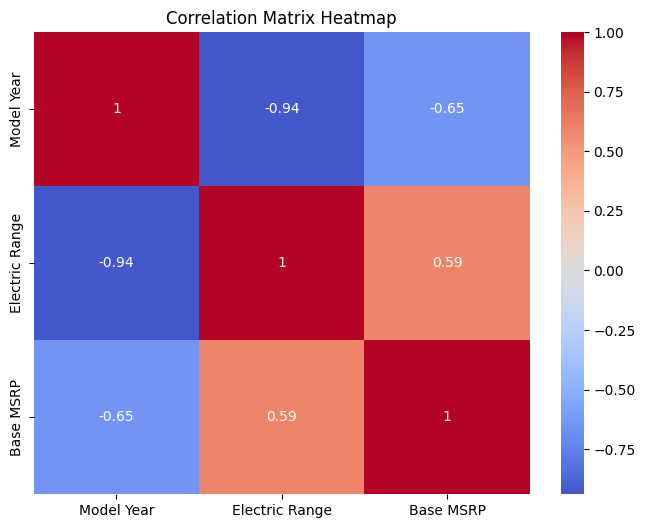

In [31]:

# Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = df_filtered[['Model Year', 'Electric Range', 'Base MSRP']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()



<Figure size 1000x600 with 0 Axes>

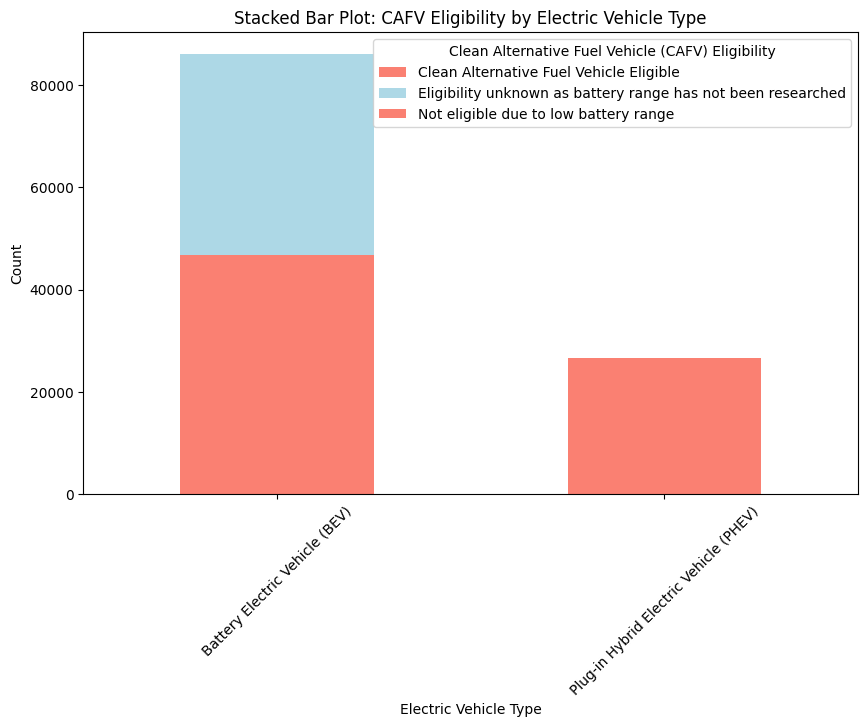

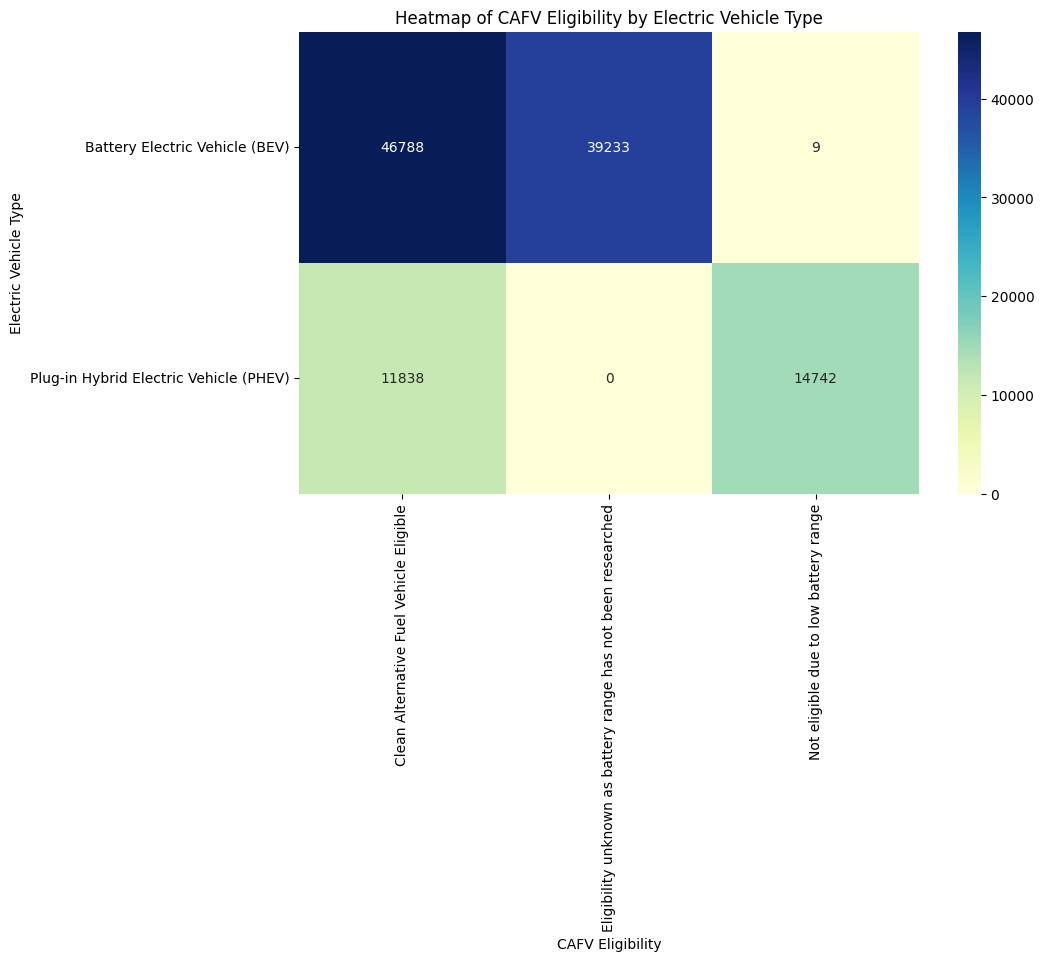

In [32]:
plt.figure(figsize=(10, 6))
ct_table = pd.crosstab(df['Electric Vehicle Type'], df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
ct_table.plot(kind='bar', stacked=True, color=['salmon', 'lightblue'], figsize=(10, 6))
plt.title('Stacked Bar Plot: CAFV Eligibility by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Heatmap of Contingency Table
plt.figure(figsize=(10, 6))
sns.heatmap(ct_table, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Heatmap of CAFV Eligibility by Electric Vehicle Type')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Electric Vehicle Type')
plt.show()

**Task 2:**

Create a Choropleth using plotly.express to display the number of EV vehicles based on location.

In [33]:
!pip install plotly

In [34]:
import plotly.express as px
# Group the data by state and count the number of EVs
count_by_state = df.groupby("State").size().reset_index(name="count")

fig = px.choropleth(
    count_by_state,
    locations="State",
    color="count",
    locationmode="USA-states",
    scope="usa",
    labels={"count": "NO OF EV's"},
    title="Number of EVs by State"
)

fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    title_x=0.5
)

fig.show()

**Task 3:**

Create a Racing Bar Plot to display the animation of EV Make and its count each year.



In [35]:
import plotly.express as px
import warnings

make_year_data = df.groupby(['Model Year', 'Make'])['VIN (1-10)'].count().reset_index()
make_year_data.columns = ['Model Year', 'Make', 'Count']

fig = px.bar(make_year_data,
             x='Make',
             y='Count',
             color='Make',
             animation_frame='Model Year',
             animation_group='Make',
             range_y=[0, make_year_data['Count'].max() + 50],
             title='Electric Vehicle Makes Over Time',
             labels={'Count': 'Number of Vehicles', 'Make': 'EV Make'},
             text='Count')
fig.update_layout(title_font_size=20,
                  xaxis_title_font_size=14,
                  yaxis_title_font_size=14,
                  legend_title_text='Electric Vehicle Make',
                  margin=dict(l=40, r=40, t=40, b=40))


fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.show()


In [36]:
#!pip install bar_chart_race


In [37]:
import bar_chart_race as bcr

In [38]:

car_per_year = df.groupby(['Make', 'Model Year']).size().reset_index(name='number_of_Vehicles')

print(car_per_year)


      Make  Model Year  number_of_Vehicles
0     AUDI        2016                 214
1     AUDI        2017                 187
2     AUDI        2018                 174
3     AUDI        2019                 392
4     AUDI        2020                 224
..     ...         ...                 ...
204  VOLVO        2019                 190
205  VOLVO        2020                 162
206  VOLVO        2021                 580
207  VOLVO        2022                 882
208  VOLVO        2023                  21

[209 rows x 3 columns]


In [39]:
# Create the animated racing bar plot
fig = px.bar(car_per_year,
             y='Make',
             x='number_of_Vehicles',
             color='Make',
             animation_frame='Model Year',
             orientation='h',
             title='EV Makes and their Count Over the Years',
             labels={'Number_of_Vehicles': 'Number of EV Vehicles'},
             range_x=[0, 3000]
            )

fig.update_traces(texttemplate='%{x}',
                  textposition='outside',
                  textfont_size=16)
fig.update_layout(
    xaxis=dict(showgrid=True, gridcolor='LightGray'),
    yaxis_title='EV Makes',
    xaxis_title='Number of EV Vehicles',
    showlegend=False,
    title_x=0.5,
    title_font=dict(size=20),
    margin=dict(l=50, r=50, t=50, b=50),
    width=800,
    height=600
)

fig.show()



In [40]:
import bar_chart_race as bcr

In [41]:

df_counts = df.groupby(['Model Year', 'Make']).size().unstack(fill_value=0)


In [42]:
bcr.bar_chart_race(
    df=df_counts,
    filename='ev_make_race.gif',  # Change output file to GIF
    title='Electric Vehicle Make Count Over Time',
    period_length=3000,
    sort ='desc',
    n_bars = 10,
    steps_per_period = 45,
    figsize=(10, 6),  # Adjust figure size (width, height)
    title_size=10,  # Title size
    bar_label_size= 10 # Speed of the animation
)

In [43]:
from IPython.display import Image

Image("ev_make_race.gif")

